# Polynomial Regression and Cross Validation

For the first assignment we will do something that might seem familiar from *Probability Theory for Machine Learning*; try to fit a polynomial function to a provided dataset. Fitting a function is a quintessential example of *supervised learning*, specifically *regression*, making it a great place to start using machines to learn about *machine learning*. There are several concepts here that are applicable to lots of *supervised learning* algorithms, so it will be good to cover them in a familiar context first.

The notion of a *cost function* will be introduced here, which describes how well a given model fits the provided data. This function can then be minimized in several different ways, depending on complexity of the model and associated cost function, e.g. using *gradient descent* to iteratively approach the minimum or computing the minimum directly using an analytic method, both of which you may have seen some version of before.

We will start with the most basic model (linear) and compute the parameters that minimize the cost function directly, based on the derivate. It is important that you try and comprehend what you are doing in this most basic version (instead of just blindly trying to implement functions until they seem to work), as it will help you understand the more complex models that use the same principles later on. This means actually **watching the linked videos** and computing the partial derivates yourself to verify you understand all of the steps. 

The other common concept introduced is model selection using *cross validation*. In this assignment it will be used to determine the degree of the polynomial we are fitting. Both cross validation for model selection and minizing a the cost function to achieve the best possible fit, are used in many other supervised models, like for example *neural networks*.

## Material

The material for this assignment is based on sections **2.6 - 2.8** and **4.6 - 4.8** of the book *[Introduction to Machine Learning](https://www.cmpe.boun.edu.tr/~ethem/i2ml3e/)* by Ethem Alpaydin. In addition, there will be links to videos from Andrew Ng's *[Machine Learning course on Coursera](https://www.coursera.org/learn/machine-learning)* to provide some extra explanations and help create intuitions.

Generally speaking, using built-in functions will be fine for this course, but for this assignment you **may not** use any of the polynomial functions listed [here](https://docs.scipy.org/doc/numpy/reference/routines.polynomials.poly1d.html) or other built-in polynomial solution methods. You can of course use them to check your own implementations work correctly.

In total there are *27* points available in this exercise. Below are some imports to get your started. You do not need to add any code for this cell to work, just make sure you run the cell to actually import the libraries in your notebook.


In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Loading the data [1 pt]

Write a function to read the data stored in the file *points.csv* and convert it to a *Numpy* array. Each line in the file is a data point consisting of an **x**-value and **r**-value, separated by a comma. You could use Numpy's [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html), or any other method of your choice to read csv-files and convert that to the correct type.

Test your function and print the resulting array to make sure you know what the data looks like.

In [52]:
def load_file(filename):
    return np.loadtxt(filename, delimiter=',')

In [53]:
data = load_file("points.csv")

## Plotting the points [2 pt]

Write a function to separate your data into an X vector and a R vector using [slicing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

Using both vectors, create a graph containing the plotted points you just read from the file. For this you can use the *matplotlib* functions [plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [show](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show). A plot of data should be visble below your code.

In [245]:
def split_X_R(data):
    X = data[:,np.zeros((1,), dtype=int)]
    R = data[:,np.ones((1,), dtype=int)]
    return X, R

X, R = split_X_R(data)

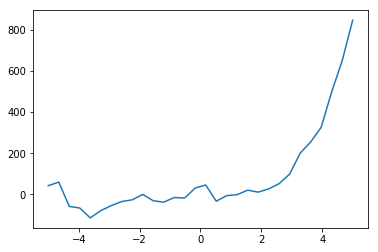

In [246]:
plt.plot(X,R)
plt.show()

## Defining the linear model [1 pt]

Now we are going to try to find the function which best relates these points. We will start by fitting a simple linear function of the form

(2.15) $$g(x) = w_1x + w_0$$

*For more detailed description of linear regression, watch Andrew's videos on the topic. The notation is slightly different, $y$ instead of $r$ for the output, and $\theta$ instead of $w$ for the model parameters, but the actual model is identical.*
* [Supervised Learning](https://www.youtube.com/watch?v=ls7Ke48jCt8&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=3)
* [Linear Model](https://www.youtube.com/watch?v=PBZUjnGuXjA&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=5)

Now write a function that computes the predicted output value $g(x)$ given a value of $x$ and the parameters $w_0$ and $w_1$. This should be very straightforward, but make sure you understand what part this plays in our supervised learning problem before moving on.

In [399]:
def linear_model(w0, w1, x):
    return w1*x+w0

## Creating the cost function [2 pt]

The cost function is defined as the sum of the squared errors of each prediction

(2.16) $$E(w_1, w_0|X) = \frac{1}{N}\sum^N_{t=1} [r^t - (w_1x^t + w_0)]^2$$

*These videos are great for building intuition on the relation between the hypothesis function and the associated cost of that hypothesis for the data.*
* [Cost function 1](https://www.youtube.com/watch?v=EANr4YttXIQ&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=6)
* [Cost function 2](https://www.youtube.com/watch?v=J5vJFwQWOaY&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=7)

Write a function to compute the cost based on the dataset $X$, $R$ and parameters $w_0$ and $w_1$. Based on your plot of the data, try to estimate some sensible values for $w_0$ and $w_1$ and compute the corresponding cost. Try at least 3 different guesses and print their cost. Order the prints of your guesses from highest to lowest cost.

In [400]:
def linear_cost(w0, w1, X, R):
    n = len(X)
    return 1/n * (np.sum(R - ((w1*X)+w0)))**2

In [401]:
linear_cost(-200, 25, X,R)

2451693.3477803115

In [402]:
linear_cost(0, 50, X,R)

221222.81600985234

In [403]:
linear_cost(90, 40, X,R)

511.0767131460761

## Fitting the linear model [4 pt]

We can find the minimum value of the cost function by taking the partial derivatives of that cost function for both of the weights $w_0$ and $w_1$ and setting them equal to $0$, resulting in the equations

(2.17a) $$w_1 = \frac{\sum_tx^tr^t - \bar{x}\bar{r}N}{\sum_t(x^t)^2 - N\bar{x}^2}$$
(2.17b) $$w_0 = \bar{r} - w_1\bar{x}$$

You can compute the partial derivates of equation *2.16* yourself and set them both equal to zero, to check you understand where these two equations come from. Minimizing the cost function gives us the best possible parameters for a linear model predicting the values of the provided dataset. *Note:* If you are unfamiliar with the notation $\bar{x}$, it is defined in *Alpaydin* too, below equation *2.17*.

Write a function which computes the optimal values of $w_0$ and $w_1$ for a dataset consisting of the vectors $X$ and $R$, containing $N$ elements each. Use *matplotlib* again to plot the points, but now also add the line representing the hypothesis function you found. As the line is linear, you can simply plot it by computing the 2 end points and have *matplotlib* draw the connecting line.

Note that with some clever [array operations](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) and [linear algebra](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) you can avoid explicitly looping over all the elements in $X$ and $R$ in `linear_fit`, which will make you code a lot faster. However, this is just an optional extra and any working implementation of the equations above will be considered correct.

In [404]:
def linear_fit(X, R, N):
    x = np.sum(X/N)
    r = np.sum(R/N)
    
    w1_noemer = np.sum((X**2) - N*x**2)
    w1_teller = np.dot(X.T,R) - x*r*N
    w1 = w1_teller/w1_noemer
    
    w0 = r - w1*x
    
    return w1[0][0],w0[0][0]

In [405]:
linear_fit(X,R,len(X))

(52.14107002009267, 85.87254431420487)

## Polynomial data [3 pt]

The linear model can easily be extended to polynomials of any order by expanding the original input with the squared input $x^2$, the cubed input $x^3$, etc and adding additional weights to the model. For ease of calculation, the input is also expanded with a vector of $1$'s, to represent the input for the constant parameter $w_0$. The parameters then become $w_0$, $w_1$, $w_2$, etc., one factor for each term of the polynomial.

So if originally the dataset of $N$ elements is of the form $X$ (superscripts are indices here)

$$ X = \left[\begin{array}{c} x^1 \\ x^2 \\ \vdots \\ x^N \end{array} \right]$$

Then the matrix $D$ for a $k^{th}$-order polynomial becomes

$$ D = \left[\begin{array}{cccc}
1 & x^1 & (x^1)^2 & \cdots & (x^1)^k \\ 
1 & x^2 & (x^2)^2 & \cdots & (x^2)^k \\ 
\vdots \\
1 & x^N & (x^N)^2 & \cdots & (x^N)^k \\ 
\end{array} \right]$$

Write a function `create_D_matrix` that constructs this matrix for a given vector $X$ up the specified order $k$. Looking at plots for the dataset we have been using so far, the relationship between the points will probably be at least be quadratic. Use the function to construct a matrix $D$ of order $2$, print the matrix and verify that it looks correct.

In [406]:
def create_D_matrix(X, k):
    new_X = np.hstack([np.ones((len(X),1)), X])
    for i in range(1,k):
        new_X = np.hstack([new_X, X**(i+1)])
    return new_X

In [407]:
D_matrix = create_D_matrix(X,2)

In [408]:
D_matrix

array([[ 1.        , -5.        , 25.        ],
       [ 1.        , -4.65517241, 21.6706302 ],
       [ 1.        , -4.31034483, 18.57907253],
       [ 1.        , -3.96551724, 15.72532699],
       [ 1.        , -3.62068966, 13.10939358],
       [ 1.        , -3.27586207, 10.73127229],
       [ 1.        , -2.93103448,  8.59096314],
       [ 1.        , -2.5862069 ,  6.68846611],
       [ 1.        , -2.24137931,  5.02378121],
       [ 1.        , -1.89655172,  3.59690844],
       [ 1.        , -1.55172414,  2.4078478 ],
       [ 1.        , -1.20689655,  1.45659929],
       [ 1.        , -0.86206897,  0.7431629 ],
       [ 1.        , -0.51724138,  0.26753864],
       [ 1.        , -0.17241379,  0.02972652],
       [ 1.        ,  0.17241379,  0.02972652],
       [ 1.        ,  0.51724138,  0.26753864],
       [ 1.        ,  0.86206897,  0.7431629 ],
       [ 1.        ,  1.20689655,  1.45659929],
       [ 1.        ,  1.55172414,  2.4078478 ],
       [ 1.        ,  1.89655172,  3.596

## Polynomial model [2 pt]

The parameters can now be represented as

$$ w = \left[\begin{array}{c} w_0 \\ w_1 \\ \vdots \\ w_k \end{array} \right]$$

The hypothesis for a single input then just becomes

$$ g(x^1) = \sum_{i=0}^k D^1_iw_i $$

Which can write as a matrix multiplication for all inputs in a single equation

$$ \left[\begin{array}{cccc}
1 & x^1 & (x^1)^2 & \cdots & (x^1)^k \\ 
1 & x^2 & (x^2)^2 & \cdots & (x^2)^k \\ 
\vdots \\
1 & x^N & (x^N)^2 & \cdots & (x^N)^k \\ 
\end{array} \right]
\left[\begin{array}{c} w_0 \\ w_1 \\ \vdots \\ w_k \end{array} \right] = \left[\begin{array}{c} g(x^1) \\ g(x^2) \\ \vdots \\ g(x^N) \end{array} \right]$$

You can do matrix multiplication using the [dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) function. Write 2 functions for computing the polynomial below

* `poly_val` should take a single input value $x$ and a vector of polynomial weights $W$ and compute the single hypothesis value for that input.
* `poly_model` should take a matrix $D$ and weight vector $W$ and compute the corresponding vector of hypotheses. 


In [409]:
def poly_val(x, W):
    return np.sum(np.dot(x, W))

def poly_model(D, W):
    h = []
    for i in range(0,len(D[:,0])):
        h.append(poly_val(D[i],W))
    return np.array(h)

## Polynomial cost function and model fitting [3 pts]

And for the cost function we can now use

$$ E(w|X) = \frac{1}{2N} \sum_{t=1}^N [r^t - D^tw]^2$$

Here, we compute the hypothesis $g(x)$ for every example using $D^tw$, take the difference with the actual output $r$ and finally square and sum each difference. Note that this is extremely similar to the mean squared error function we used for the linear case, and also that minimizing this error function is actually equivalent to maximizing the log likelihood of the parameter vector $w$ (see equations $4.31$ and $4.32$).

Now we have the cost function equation and can again take the partial derivative for each of the weights $w_0$ to $w_k$ and set their value equal to $0$. Solving the resulting system of equations will give the set of weights that minimize the cost function. The weights describing this lowest point of the cost function are the parameters which will produce the line that best fits our dataset.

Solving all partial derivate equations for each weight can actually be done with just a couple of matrix operations. Deriving the equation yourself can be a bit involved, but know that the principle is exactly the same as for the linear model computing just $w_0$ and $w_1$. The final equation for weight vector becomes

(4.33) $$ w = (D^TD)^{-1}D^Tr $$

Numpy has built in functions for [transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html) and [inverse](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html). Use them to write the code for the following functions.

* `poly_cost` should return the total cost $E$ given $w$, $D$ and $r$
* `poly_fit` should return the vector $w$ that bests fits the polynomial relationship between matrix $D$ and vector $r$

Using the quadratic matrix $D$ you constructed earlier and this `poly_fit` function, find the best fitting weights for a quadric polynomial on the data and print these weights


In [410]:
from numpy.linalg import inv

In [411]:
def poly_cost(W, D, R):
    return (1/2*len(R)) * np.sum(R - np.dot(D,W))**2
    
def poly_fit(D, R):
    Dt = np.transpose(D)
    
    invDtD = inv(np.dot(Dt, D))
    
    invDtDDt = np.dot(invDtD,Dt)    
    
    w = np.dot(invDtDDt,R)
    
    return w

In [412]:
W = poly_fit(D_matrix,R)

In [413]:
W

array([[-56.87348684],
       [ 52.14107002],
       [ 16.02439317]])

## Plotting polynomials [1 pt]

Now lets try and figure out what our fitted quadratic polynomial looks like. As the function is not linear, we will need more than just 2 points to actually plot the line. The easiest solution is to create a whole bunch of x-values as samples, compute the corresponding y-values and plot those. With enough samples the line will look smooth, even if it is connected with linear segments.

To create these x-values samples, we can use the function [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html). Then just use the `poly_val` function you wrote earlier and apply it to every x-value to compute the array of y-values. Now just plot the original datapoints as dots and the hypothesis as a line, just as for the linear plot. Don't forget to show your plot at the end.

Use these steps to fill in the `poly_plot` function below and show the polynomial function defined by the weights you found for the quadratic polynomial.

In [414]:
def poly_plot(W, X, R):
    x = np.linspace(np.min(X), np.max(X), num=len(X),endpoint=True)
    x = np.array([[i] for i in x])
    matrix_Z = create_D_matrix(x,len(W)-1)
    y = poly_model(matrix_Z, W)
    
    plt.plot(x,y)
    plt.plot(X,R, 'ro')

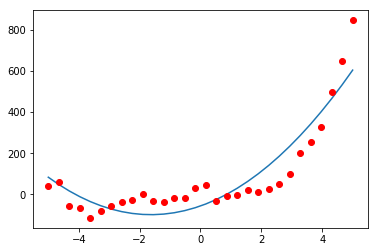

In [415]:
poly_plot(W,X,R)

## Polynomial order [1 pt]

You can now create a polynomial fit on the data for a polynomial of any order. The next question then becomes: *What order polynomial fits the data the best?*

Using the `create_D_matrix`, `poly_fit` and `poly_plot`, try to fit different order polynomials to the data. Show the plot for the order polynomial you think fits best.

Note that the cost function will most likely decrease with each added polynomial term, as there is more flexibility in the model to fit the data points exactly. However, these weights will fit those few data points very well, but might have very extreme values in between points that would not be good predictors for new inputs. Something like an order 20 polynomial might have a very well fitting shape for the existing data points, but looks like it would be strange predictor at some of the possible other points. Try to find a fit that looks visually like it would generalize well to new points.


In [416]:
matrix4 = create_D_matrix(X,4)
W4 = poly_fit(matrix4, R)
poly_cost(W4, matrix4, R)

1.7221633781476944e-21

In [417]:
matrix7 = create_D_matrix(X,7)
W7 = poly_fit(matrix7, R)
poly_cost(W7, matrix7, R)

1.0499075419680945e-18

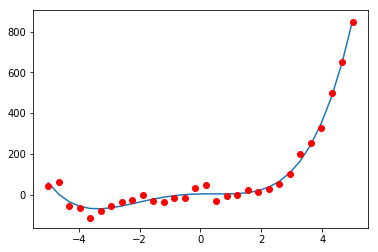

In [418]:
matrix5 = create_D_matrix(X,4)
W5 = poly_fit(matrix5, R)
poly_plot(W5,X,R)

## Cross validation [2 pt]

Another way to answer this same question is to use cross validation. With cross validation you split the data into 2 parts and use one part to fit the model (training set) and the other part to see how well the model fits the remaining data (validation set).

Write a function below to split the original dataset into 2 sets according to a given ratio. It is important to randomize your division, as simply using the first half of data for the one set and the second half for the other, might result in a strange distribution. You could use a function like [shuffle](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html) for this purpose.

Split the original dataset using a ratio of 0.6 into a training and a validation set. Then for both of these sets, use your old `split_X_R` function to split them into their $X$ and $R$ parts

In [425]:
def validation_split(data, ratio):
    d = np.random.shuffle(data)
    split = int(ratio * len(data))
    train, val = data[0:split], data[split:]
    return train, val

In [426]:
train, val = validation_split(data, 0.6)
trainX, trainR = split_X_R(train)
valX, valR = split_X_R(val)

## Model selection [5 pt]

With this new split of the data you can just repeatedly fit different order polynomials to the training set and see which produces the lowest cost on the validation set. The set of weights with the lowests cost on the validation set generalizes the best to new data and is thus the best overal fit on the dataset.

Write the function `best_poly_fit` below. Try a large range of polynomial orders (like 1 to 50), create the $D$ matrix based on the training set for each order and fit the weights for that polynomial. Then for each of these found weights, also create the D matrix for the validation set and compute the cost using `poly_cost`. Return the set of weights with the lowest cost on the validation set.

Run this fitting function with your training and validation sets. Plot the hypothesis function and show the weights that were found. Note that rerunning your validation split code above will result in a different random distribution and thus a slightly different final fit.

In [427]:
def best_poly_fit(train_x, train_r, val_x, val_r):
    mem = {}
    costs = []
    for k in range(50):
        matrix_d_train = create_D_matrix(train_x, k)
        w_dtrain = poly_fit(matrix_d_train, train_r)
        matrix_d_val = create_D_matrix(val_x, k)
        costs.append(poly_cost(w_dtrain, matrix_d_val, val_r))
        mem[costs[k]] = w_dtrain
    
    
    w = mem[min(costs)]
    poly_plot(W,val_x,val_r)
    return w

array([[-3.16184389],
       [ 2.64152729],
       [-3.30030277],
       [ 3.27792331],
       [ 0.81869131]])

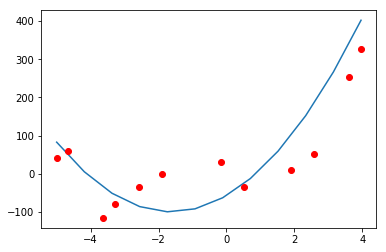

In [428]:
best_poly_fit(trainX, trainR, valX, valR)